In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('bimo_page_data.csv')
df.head()

,postTitle,postDescription,text,likesCount,facebookUrl
0,كي تكون الماكلة سيف فالدامة، لازم تخمم زوج مرا...,NaN,اوبيمو ذقتو بصح كروس منعرفوش منريسكيش بلبنة نر...,1,https://www.facebook.com/BimoAlgerie/posts/pfb...
1,كي تكون الماكلة سيف فالدامة، لازم تخمم زوج مرا...,NaN,ارواحلي طابي بصح نا نلعب ببرينو و نتا تلعب بشي...,1,https://www.facebook.com/BimoAlgerie/posts/pfb...
2,كي تكون الماكلة سيف فالدامة، لازم تخمم زوج مرا...,NaN,قلتها و نعاودها و الله مكان أدمن كيما هاذ لابا...,3,https://www.facebook.com/BimoAlgerie/posts/pfb...
3,كي تكون الماكلة سيف فالدامة، لازم تخمم زوج مرا...,NaN,U impressed me as always 3ami bimo lmoukh😇 l’e...,1,https://www.facebook.com/BimoAlgerie/posts/pfb...
4,كي تكون الماكلة سيف فالدامة، لازم تخمم زوج مرا...,NaN,و تانغووو وين بيمو وتحلى حياة 😂😂😂😂🤣🤣🤣,2,https://www.facebook.com/BimoAlgerie/posts/pfb...


In [5]:
from transformers import pipeline

In [9]:
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="alger-ia/dziribert_sentiment",
    tokenizer="alger-ia/dziribert_sentiment"
)

config.json:   0%|          | 0.00/810 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


In [10]:
df['sentiment'] = df['text'].astype(str).apply(lambda x: sentiment_pipeline(x)[0]['label'])
df['score'] = df['text'].astype(str).apply(lambda x: sentiment_pipeline(x)[0]['score'])

In [11]:
df.head()

,postTitle,postDescription,text,likesCount,facebookUrl,sentiment,score
0,كي تكون الماكلة سيف فالدامة، لازم تخمم زوج مرا...,NaN,اوبيمو ذقتو بصح كروس منعرفوش منريسكيش بلبنة نر...,1,https://www.facebook.com/BimoAlgerie/posts/pfb...,positive,0.710465
1,كي تكون الماكلة سيف فالدامة، لازم تخمم زوج مرا...,NaN,ارواحلي طابي بصح نا نلعب ببرينو و نتا تلعب بشي...,1,https://www.facebook.com/BimoAlgerie/posts/pfb...,negative,0.533223
2,كي تكون الماكلة سيف فالدامة، لازم تخمم زوج مرا...,NaN,قلتها و نعاودها و الله مكان أدمن كيما هاذ لابا...,3,https://www.facebook.com/BimoAlgerie/posts/pfb...,negative,0.940180
3,كي تكون الماكلة سيف فالدامة، لازم تخمم زوج مرا...,NaN,U impressed me as always 3ami bimo lmoukh😇 l’e...,1,https://www.facebook.com/BimoAlgerie/posts/pfb...,positive,0.997698
4,كي تكون الماكلة سيف فالدامة، لازم تخمم زوج مرا...,NaN,و تانغووو وين بيمو وتحلى حياة 😂😂😂😂🤣🤣🤣,2,https://www.facebook.com/BimoAlgerie/posts/pfb...,positive,0.964317


/tmp/ipython-input-327563621.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="Set2")


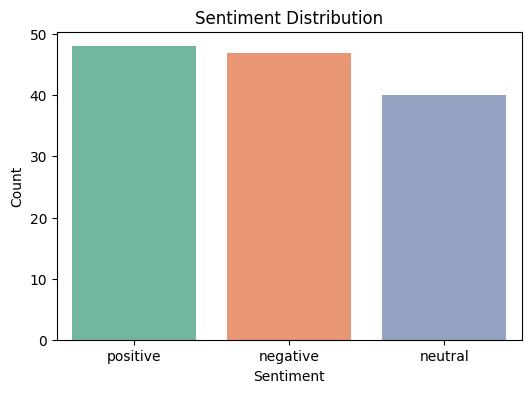

In [12]:
sentiment_counts = df["sentiment"].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="Set2")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


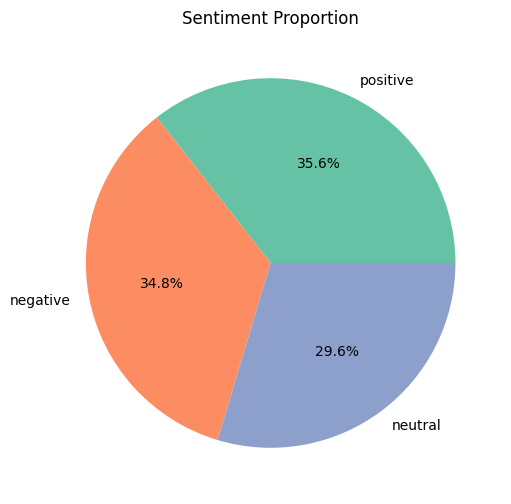

In [13]:
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set2"))
plt.title("Sentiment Proportion")
plt.show()


E: Unable to locate package fonts-amiri


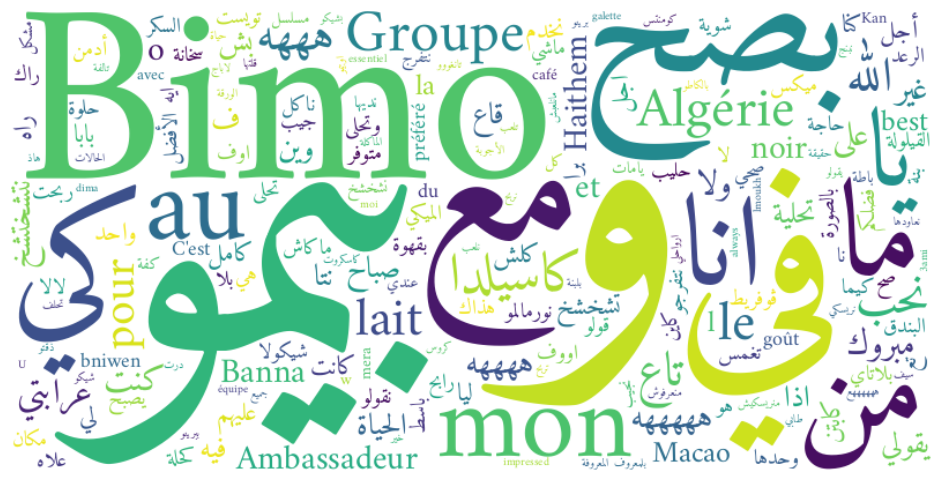

In [30]:
from wordcloud import WordCloud

# Drop NA and convert everything to string
comments = df['text'].dropna().astype(str)

# Join all comments into one big string
text = " ".join(comments)

# Download an Arabic font (Amiri)
!wget -q https://github.com/alif-type/amiri/releases/download/0.113/amiri-0.113.zip
!unzip -q amiri-0.113.zip -d /usr/share/fonts/truetype/
font_path = "/usr/share/fonts/truetype/amiri-0.113/Amiri-Regular.ttf"

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400,
                      background_color="white",
                      font_path=font_path,
                      collocations=False).generate(text)

# Show the word cloud
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



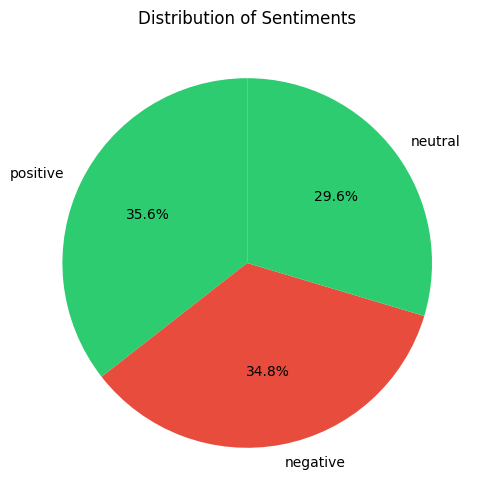

In [40]:
# Count values of each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#2ecc71', '#e74c3c']  # green for positive, red for negative
)
plt.title("Distribution of Sentiments")
plt.show()
